# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hasta Suci Purbaningsih
- **Email:** hastaarbani@gmail.com
- **ID Dicoding:** hastasc

## Menentukan Pertanyaan Bisnis

1. At what time are bike rentals at their highest?
2. How does the weather affect bicycle rentals?
3. What is the pattern of bicycle rentals by season and month?
4. How do holidays affect bicycle rentals?
5. How does the count of bicycle rentals differ between weekdays and weekends?
6. How does the count of casual and registered users compare in 2011 and 2012?

## Import Semua Packages/Library yang Digunakan

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [49]:
#Load Day Table
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [50]:
#Load Hour Table
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [51]:
#Shape of the data
print(day_df.shape)
print(hour_df.shape)

(731, 16)
(17379, 17)


**Insight:**
- hour table more detail than day table
- so im gonna use hour table

### Assessing Data

In [52]:
#Checking Data Types of hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [53]:
#Missing Values in hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [54]:
#Duplicates Summary in hour_df
hour_df.duplicated().sum()

0

In [55]:
#Statistical Summary of hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- No Missing Values
- No Duplicates
- Need Changing Datatypes and columns name

### Cleaning Data

#### Drop Unusable Column

In [56]:
#Dropping 'instant' column from hour_df
hour_df.drop('instant', axis=1, inplace=True)

#Renaming hour_df into rent_df
rent_df = hour_df
rent_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Renaming Columns

In [57]:
#Renaming columns in rent_df
rent_df.rename(columns={
    'dteday':'date', 
    'yr':'year', 
    'mnth':'month', 
    'hr':'hour',
    'weekday':'day',
    'weathersit':'weather', 
    'cnt':'count'
    }, inplace=True)
rent_df.head()

,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Converting Values in Categorical Columns

In [58]:
#Converting season values to season names
rent_df['season'] = rent_df['season'].replace({
    1:'Spring',
    2:'Summer',
    3:'Fall',
    4:'Winter'
})

#Converting year values  
rent_df['year'] = rent_df['year'].replace({
    0:'2011',
    1:'2012'
})

#Converting month values to month names
rent_df['month'] = rent_df['month'].replace({
    1:'Jan', 2:'Feb', 3:'Mar',
    4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sept',
    10:'Oct', 11:'Nov', 12:'Dec'
})

#Converting holiday values 
rent_df['holiday'] = rent_df['holiday'].replace({
    0:'Not holiday', 1:'Holiday'
})

#Converting day values to day names
rent_df['day'] = rent_df['day'].replace({
    0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed',
    4:'Thu', 5:'Fri', 6:'Sat'
})

#Converting workingday values
rent_df['workingday'] = rent_df['workingday'].replace({
    0:'Weekends', 1:'Weekdays'
})

#Converting weather values to weather names
rent_df['weather'] = rent_df['weather'].replace({
    1:'Clear/Partly cloudy', 
    2:'Mist/Cloudy', 
    3:'Light Rain/Light Snow', 
    4:'Heavy Rain/Snow/Fog'
})

rent_df.head()

,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Not holiday,Sat,Weekends,Clear/Partly cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,Not holiday,Sat,Weekends,Clear/Partly cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,Not holiday,Sat,Weekends,Clear/Partly cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,Not holiday,Sat,Weekends,Clear/Partly cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,Not holiday,Sat,Weekends,Clear/Partly cloudy,0.24,0.2879,0.75,0.0,0,1,1


#### Denormalizing the 'temp', 'atemp', 'hum', 'windspeed' columns into actual values

In [59]:
#Denormalizing the 'temp', 'atemp', 'hum', and 'windspeed' columns
rent_df['temp'] = rent_df['temp']*41
rent_df['atemp'] = rent_df['atemp']*50
rent_df['hum'] = rent_df['hum']*100
rent_df['windspeed'] = rent_df['windspeed']*67

rent_df

,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Not holiday,Sat,Weekends,Clear/Partly cloudy,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01,Spring,2011,Jan,1,Not holiday,Sat,Weekends,Clear/Partly cloudy,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01,Spring,2011,Jan,2,Not holiday,Sat,Weekends,Clear/Partly cloudy,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01,Spring,2011,Jan,3,Not holiday,Sat,Weekends,Clear/Partly cloudy,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01,Spring,2011,Jan,4,Not holiday,Sat,Weekends,Clear/Partly cloudy,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,Dec,19,Not holiday,Mon,Weekdays,Mist/Cloudy,10.66,12.880,60.0,11.0014,11,108,119
17375,2012-12-31,Spring,2012,Dec,20,Not holiday,Mon,Weekdays,Mist/Cloudy,10.66,12.880,60.0,11.0014,8,81,89
17376,2012-12-31,Spring,2012,Dec,21,Not holiday,Mon,Weekdays,Clear/Partly cloudy,10.66,12.880,60.0,11.0014,7,83,90
17377,2012-12-31,Spring,2012,Dec,22,Not holiday,Mon,Weekdays,Clear/Partly cloudy,10.66,13.635,56.0,8.9981,13,48,61


#### Converting columns into right format

In [60]:
#Converting 'date' column to datetime format
rent_df['date'] = pd.to_datetime(rent_df['date'])

#Converting columns to category
rent_df['season'] = rent_df['season'].astype('category')
rent_df['year'] = rent_df['year'].astype('category')
rent_df['month'] = rent_df['month'].astype('category')
rent_df['holiday'] = rent_df['holiday'].astype('category')
rent_df['day'] = rent_df['day'].astype('category')
rent_df['workingday'] = rent_df['workingday'].astype('category')
rent_df['weather'] = rent_df['weather'].astype('category')

rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   year        17379 non-null  category      
 3   month       17379 non-null  category      
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   day         17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weather     17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: category(7), dateti

#### Handling Outliers

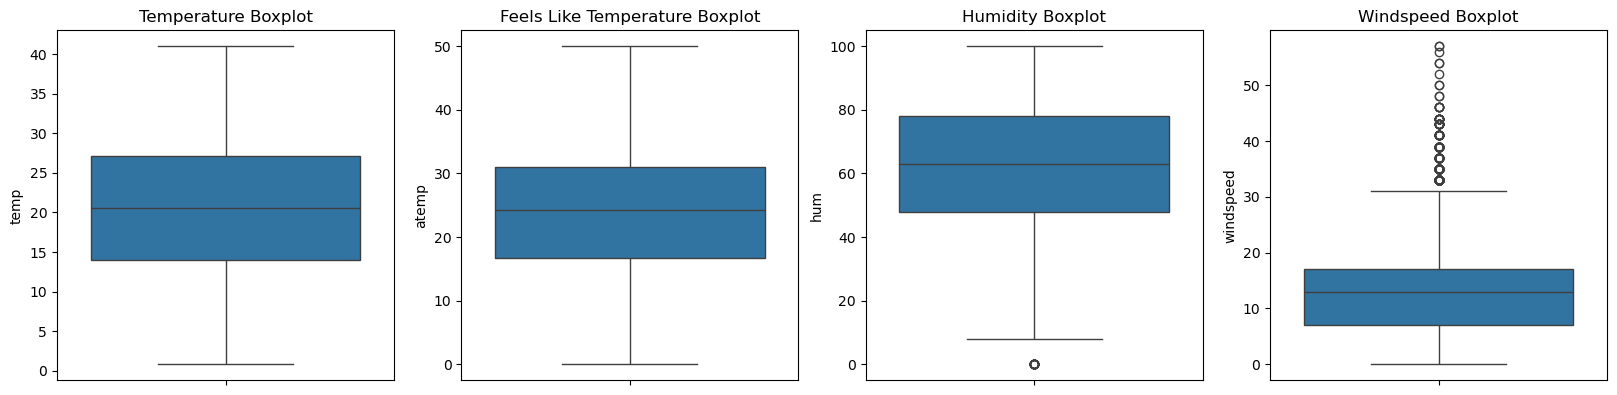

In [61]:
# Checking for Outliers with Boxplots
plt.figure(figsize=(20, 10))  
plt.subplot(2, 4, 1) 
sns.boxplot(rent_df['temp'])
plt.title('Temperature Boxplot')
plt.subplot(2, 4, 2)
sns.boxplot(rent_df['atemp'])
plt.title('Feels Like Temperature Boxplot')
plt.subplot(2, 4, 3)
sns.boxplot(rent_df['hum'])
plt.title('Humidity Boxplot')
plt.subplot(2, 4, 4)
sns.boxplot(rent_df['windspeed'])
plt.title('Windspeed Boxplot')

plt.show()

In [62]:
#Removing Outliers in 'hum' column
Q1 = (rent_df['hum']).quantile(0.25)
Q3 = (rent_df['hum']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

lower_than = rent_df['hum'] < minimum
more_than = rent_df['hum'] > maximum

rent_df.drop(rent_df[lower_than].index, inplace=True)
rent_df.drop(rent_df[more_than].index, inplace=True)

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\3265079996.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rent_df.drop(rent_df[more_than].index, inplace=True)


In [63]:
#Changing Outliers in 'windspeed' column
Q1 = (rent_df['windspeed']).quantile(0.25)
Q3 = (rent_df['windspeed']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

lower_than = rent_df['windspeed'] < minimum
more_than = rent_df['windspeed'] > maximum

rent_df['windspeed'].mask(lower_than, minimum, inplace=True)
rent_df['windspeed'].mask(more_than, maximum, inplace=True)


C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\1412774683.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rent_df['windspeed'].mask(lower_than, minimum, inplace=True)
C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\1412774683.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

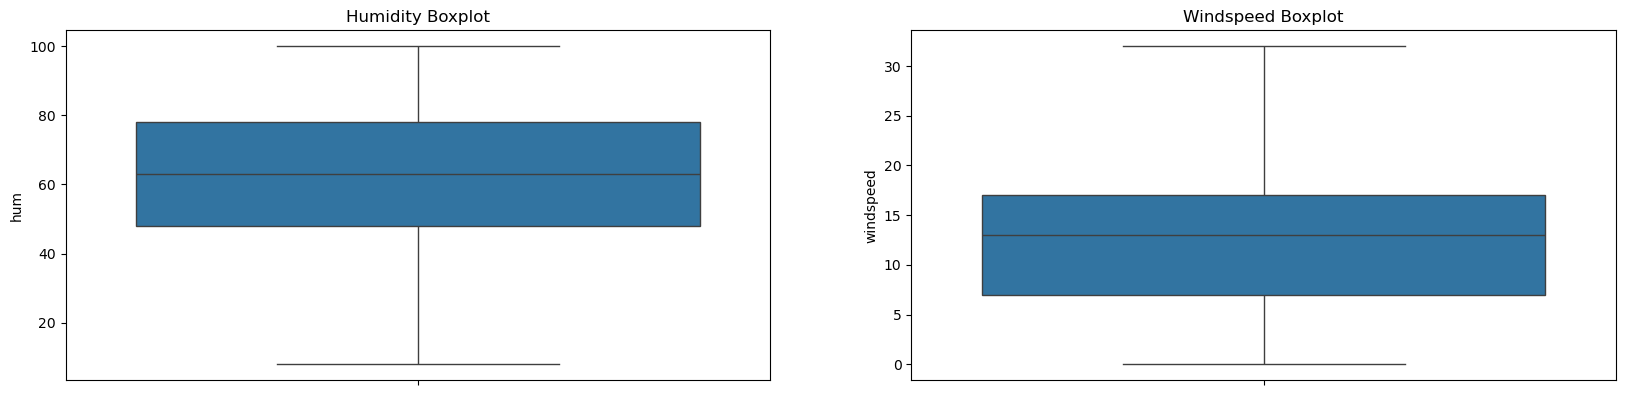

In [64]:
#Checking for Outliers with Boxplots
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.boxplot(rent_df['hum'])
plt.title('Humidity Boxplot')
plt.subplot(2,2,2)
sns.boxplot(rent_df['windspeed'])
plt.title('Windspeed Boxplot')
plt.show()

**Insight:**
- some column names have been changed for better readability
- datatypes have been changed into the right format
- values in some columns has been denormalized into actual values
- values in some categorical columns has been converted
- outliers have been dropped and changed

## Exploratory Data Analysis (EDA)

#### See sample record and describe of the df

In [65]:
rent_df.sample(5)

,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
14273,2012-08-22,Fall,2012,Aug,22,Not holiday,Wed,Weekdays,Clear/Partly cloudy,26.24,30.305,73.0,0.0000,55,226,281
432,2011-01-20,Spring,2011,Jan,1,Not holiday,Thu,Weekdays,Clear/Partly cloudy,10.66,13.635,56.0,0.0000,2,3,5
12816,2012-06-23,Fall,2012,Jun,5,Not holiday,Sat,Weekends,Mist/Cloudy,26.24,28.790,83.0,12.9980,1,11,12
12744,2012-06-20,Summer,2012,Jun,5,Not holiday,Wed,Weekdays,Clear/Partly cloudy,27.06,30.305,83.0,6.0032,2,37,39
5046,2011-08-03,Fall,2011,Aug,4,Not holiday,Wed,Weekdays,Mist/Cloudy,31.16,34.850,52.0,11.0014,0,7,7


In [66]:
rent_df.describe()

,date,hour,temp,atemp,hum,windspeed,casual,registered,count
count,17357,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000
mean,2012-01-02 13:12:48.035950848,11.545889,20.382081,23.794466,62.802385,12.636464,35.718788,153.948551,189.667339
min,2011-01-01 00:00:00,0.000000,0.820000,0.000000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-05 00:00:00,6.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-03 00:00:00,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,116.000000,142.000000
75%,2012-07-02 00:00:00,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,23.000000,41.000000,50.000000,100.000000,31.992500,367.000000,886.000000,977.000000
std,NaN,6.914537,7.898036,8.596065,19.175450,7.920077,49.321693,151.382189,181.409297


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

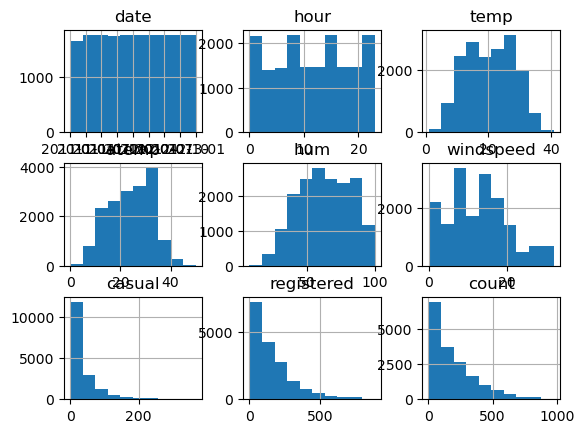

In [67]:
#Histograms of the numerical columns
rent_df.hist()

#### Pivot table 

In [68]:
#Groupping by 'hour' column
rent_df.groupby(by='hour').agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'count' : 'mean'
}).sort_values(by='count', ascending=False)

,casual,registered,count
hour,,,
17,74.373114,387.559671,461.932785
18,61.202201,364.781293,425.983494
8,21.707989,337.736915,359.444904
16,73.844993,238.537723,312.382716
19,48.830812,263.044017,311.874828
13,72.406593,181.586538,253.993132
12,68.382393,185.235213,253.617607
15,75.004121,176.554945,251.559066
14,75.671703,165.592033,241.263736


In [101]:
#Groupping by 'day' column
rent_df.groupby(by='day').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count', ascending=False)

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\1960464476.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_df.groupby(by='day').agg({


,casual,registered,count
day,,,
Fri,78238,409552,487790
Thu,61414,423358,484772
Sat,153852,323955,477807
Wed,57319,415729,473048
Tue,57843,411266,469109
Mon,70784,384719,455503
Sun,140521,303506,444027


In [70]:
#Groupping by 'weather' column
rent_df.groupby(by='weather').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count', ascending=False)

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\1263580107.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_df.groupby(by='weather').agg({


,casual,registered,count
weather,,,
Clear/Partly cloudy,462745,1875428,2338173
Mist/Cloudy,134475,661332,795807
Light Rain/Light Snow,22743,135110,157853
Heavy Rain/Snow/Fog,8,215,223


In [71]:
#Groupping by 'season' column
rent_df.groupby(by='season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count', ascending=False)

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\2281367782.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_df.groupby(by='season').agg({


,casual,registered,count
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60576,410149,470725


In [72]:
#Groupping by 'holiday' column
rent_df.groupby(by='holiday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count', ascending=False)

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\2104097531.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_df.groupby(by='holiday').agg({


,casual,registered,count
holiday,,,
Not holiday,597612,2616009,3213621
Holiday,22359,56076,78435


In [73]:
#Groupping by 'workingday' column
rent_df.groupby(by='workingday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count', ascending=False)

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\3827025649.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_df.groupby(by='workingday').agg({


,casual,registered,count
workingday,,,
Weekdays,303239,1988548,2291787
Weekends,316732,683537,1000269


In [74]:
#Groupping by 'month' column
rent_df.groupby(by='month').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count', ascending=False)

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\408084631.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_df.groupby(by='month').agg({


,casual,registered,count
month,,,
Aug,72039,279155,351194
Jun,73906,272436,346342
Sept,70323,275668,345991
Jul,78157,266791,344948
May,75285,256401,331686
Oct,59760,262592,322352
Apr,60802,208292,269094
Nov,36603,218228,254831
Mar,44398,183899,228297


In [75]:
#Groupping by 'year' column
rent_df.groupby(by='year').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'count' : 'sum'
}).sort_values(by='count', ascending=False)

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\4222383841.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_df.groupby(by='year').agg({


,casual,registered,count
year,,,
2012,372765,1676811,2049576
2011,247206,995274,1242480


**Insight:**
- Paling ramai di jam 5-6 sore dan jam 8 pagi 
- Hari tidak terlalu mempengaruhi jumlah pengguna rental sepeda
- Cuaca sangat berpengaruh terhadap jumlah pengguna rental sepeda

## Visualization & Explanatory Analysis

### Question 1: At what time are bike rentals at their highest?

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\3121103827.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  lineplot = sns.lineplot(


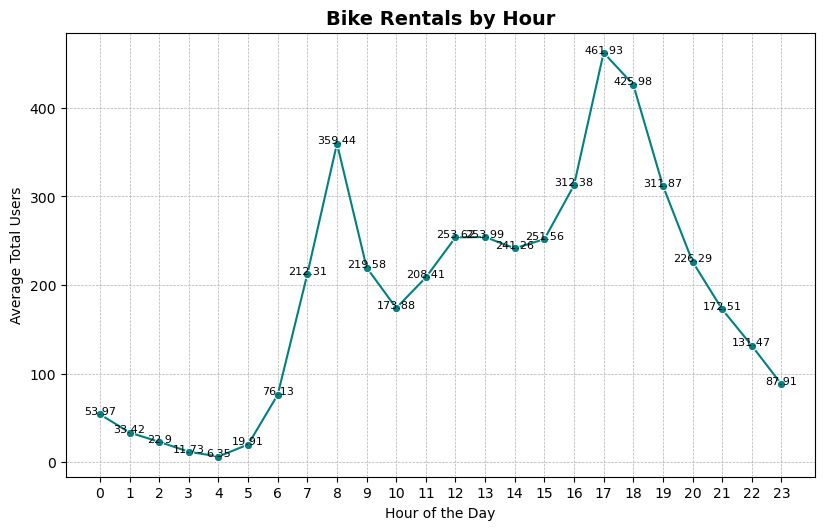

In [76]:
# Setting figure size 
plt.figure(figsize=(16, 10))  

# Plotting the lineplot 
plt.subplot(2, 2, 1)  
lineplot = sns.lineplot(
    x='hour',  
    y='count',  
    data=rent_df,  
    estimator=np.mean,  
    marker='o',  
    linestyle='-',  
    color='teal',  
    ci=None  
)

# Adding a title and labels for the axes
plt.title('Bike Rentals by Hour', fontsize=14, weight='bold')  
plt.xlabel('Hour of the Day', fontsize=10)  
plt.ylabel('Average Total Users', fontsize=10)  

# Setting the ticks 
plt.xticks(ticks=range(0, 24), fontsize=10)  
plt.yticks(fontsize=10)  

# Adding gridlines to the plot for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  

# Adding value labels on each point in the line plot
# Iterating over unique hours and the corresponding average bike rentals
for x, y in zip(rent_df['hour'].unique(), rent_df.groupby('hour')['count'].mean().values):
    lineplot.text(x, y, round(y, 2), color='black', ha='center', fontsize=8)  

# Adjusting the layout to ensure everything fits without overlapping
plt.tight_layout()

# Showing the plot
plt.show()


Insight: Paling ramai di jam 5-6 sore dan jam 8 pagi 

### Question 2: How does the weather affect bicycle rentals?


C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\304824394.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_rent_df = rent_df.groupby('weather')['count'].sum().reset_index().sort_values(by='count', ascending=False)
C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\304824394.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='weather', y='count', data=sorted_rent_df, palette=colors)


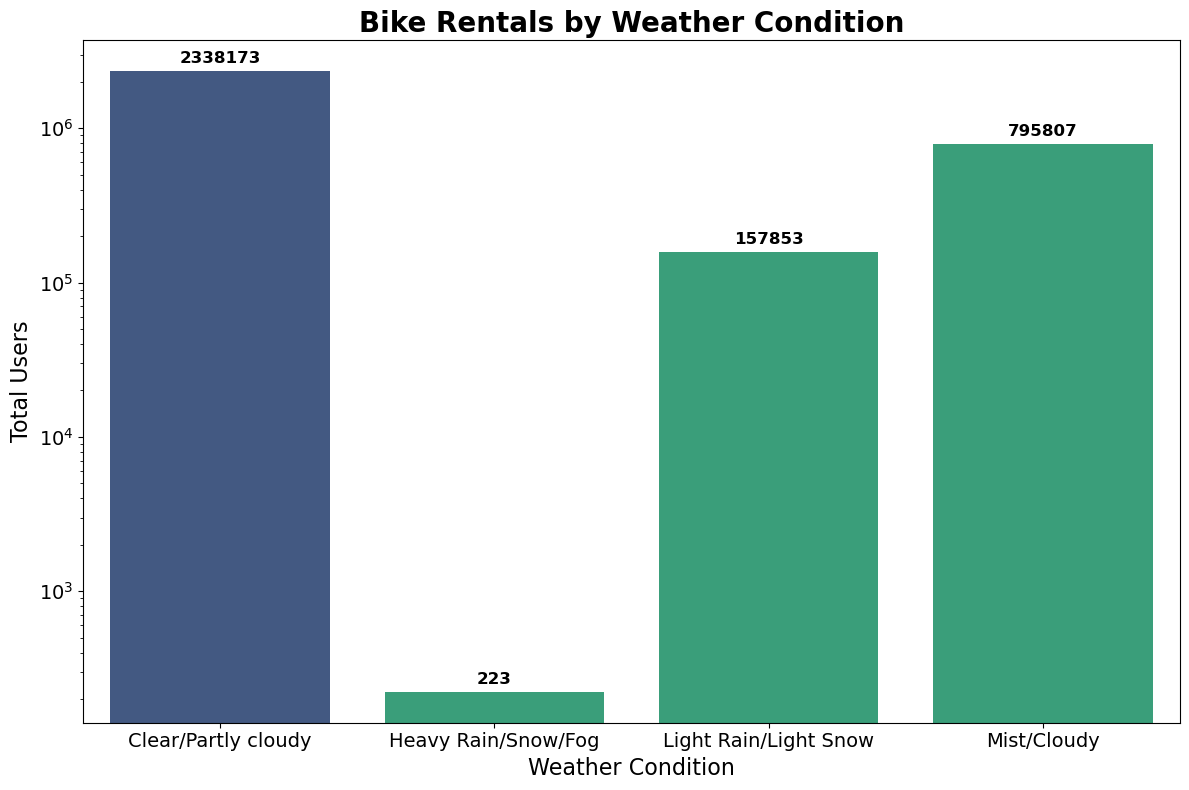

In [94]:
# Setting figure size
plt.figure(figsize=(12, 8))

# Calculating the total users by weather condition and sorting the values
sorted_rent_df = rent_df.groupby('weather')['count'].sum().reset_index().sort_values(by='count', ascending=False)

# Identifying the highest bar
max_value = sorted_rent_df['count'].max()

# Plotting the barplot with different color for the highest bar
colors = ['#29AF7FFF' if count != max_value else '#39568CFF' for count in sorted_rent_df['count']]
barplot = sns.barplot(x='weather', y='count', data=sorted_rent_df, palette=colors)

# Setting the title and labels of the plot
plt.title('Bike Rentals by Weather Condition', fontsize=20, weight='bold')
plt.xlabel('Weather Condition', fontsize=16)
plt.ylabel('Total Users', fontsize=16)

# Setting the font size of the x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Setting y-axis to log scale
plt.yscale('log')

# Adding the values on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     fontsize=12, color='black', weight='bold')

# Showing the plot
plt.tight_layout()
plt.show()

Pengguna rental sepeda paling ramai pada saat clear/partly cloudy, pada saat cuaca buruk(heavy rain/snow/fog) sangat sepi

### Question 3: What is the pattern of bicycle rentals by season and month?

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\634357742.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_rent_df = rent_df.groupby('season')['count'].sum().reset_index().sort_values(by='count', ascending=False)
C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\634357742.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='season', y='count', data=sorted_rent_df, palette=colors)


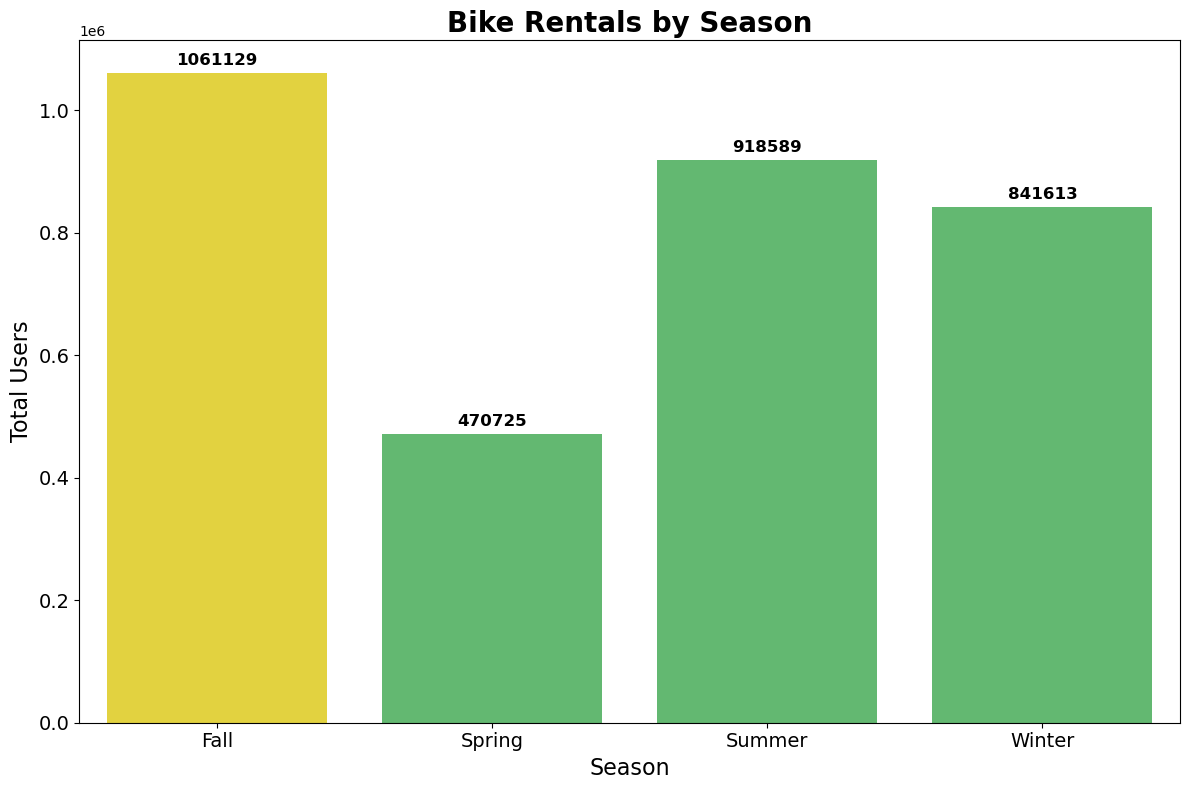

In [98]:
# Setting figure size
plt.figure(figsize=(12, 8))

# Calculating the total users by season and sorting the values
sorted_rent_df = rent_df.groupby('season')['count'].sum().reset_index().sort_values(by='count', ascending=False)

# Identifying the highest bar
max_value = sorted_rent_df['count'].max()

# Plotting the barplot with different color for the highest bar
colors = ['#55C667FF' if count != max_value else '#FDE725FF' for count in sorted_rent_df['count']]
barplot = sns.barplot(x='season', y='count', data=sorted_rent_df, palette=colors)
plt.title('Bike Rentals by Season', fontsize=20, weight='bold')
plt.xlabel('Season', fontsize=16)
plt.ylabel('Total Users', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding the values on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     fontsize=12, color='black', weight='bold')

# Showing the plot
plt.tight_layout()
plt.show()

pada musim gugur ramai, musim semi sepi

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\1127180054.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_rent_df = rent_df.groupby('month')['count'].sum().reset_index().sort_values(by='count', ascending=False)
C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\1127180054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='count', y='month', data=sorted_rent_df, palette='viridis')


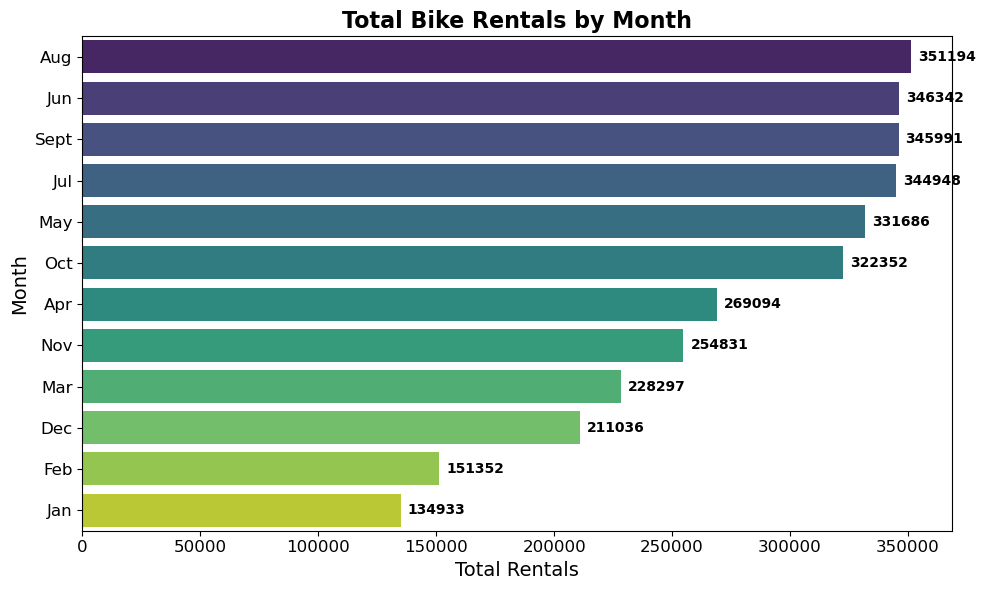

In [90]:
# Calculating and Sorting total rentals by month
sorted_rent_df = rent_df.groupby('month')['count'].sum().reset_index().sort_values(by='count', ascending=False)

# Converting 'month' column to categorical
sorted_rent_df['month'] = sorted_rent_df['month'].astype(str)
sorted_rent_df['month'] = pd.Categorical(sorted_rent_df['month'], categories=sorted_rent_df['month'], ordered=True)

# Setting figure size
plt.figure(figsize=(10, 6))

# Plotting the barplot
barplot = sns.barplot(x='count', y='month', data=sorted_rent_df, palette='viridis')
plt.title('Total Bike Rentals by Month', fontsize=16, weight='bold')
plt.xlabel('Total Rentals', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding value labels to the barplot
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'), 
                     (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     ha='left', va='center', 
                     xytext=(5, 0), 
                     textcoords='offset points',
                     fontsize=10, color='black', weight='bold')

#Showing the plot
plt.tight_layout()
plt.show()

bulan agustus juni september juli ramai, paling sepi januari

### Question 4: How do holidays affect bicycle rentals?

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\3914174289.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_counts = rent_df.groupby('holiday')['count'].sum().reset_index()


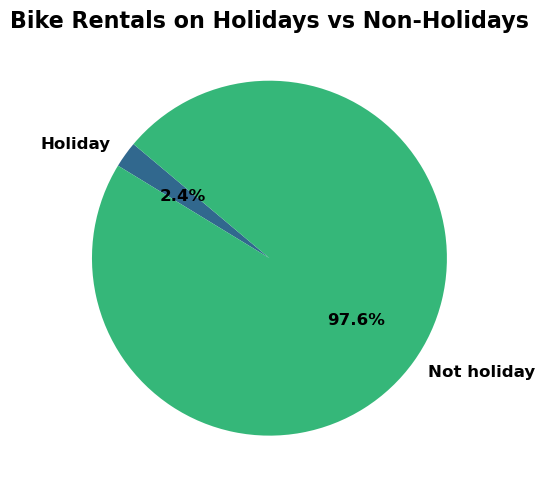

In [85]:
# Grouping the data by 'holiday' and calculating the sum of 'count'
holiday_counts = rent_df.groupby('holiday')['count'].sum().reset_index()

# Setting figure size
plt.figure(figsize=(7, 5))

# Plotting the pie chart
colors = sns.color_palette('viridis', len(holiday_counts))
plt.pie(holiday_counts['count'], labels=holiday_counts['holiday'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'})

# Setting the title
plt.title('Bike Rentals on Holidays vs Non-Holidays', fontsize=16, weight='bold')

# Showing the plot
plt.tight_layout()
plt.show()

total pengguna sewa sepeda ramai di non holiday ketimbang holiday

### Question 5: How does the count of bicycle rentals differ between weekdays and weekends?

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\2510845383.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_counts = rent_df.groupby('workingday')['count'].sum().reset_index()


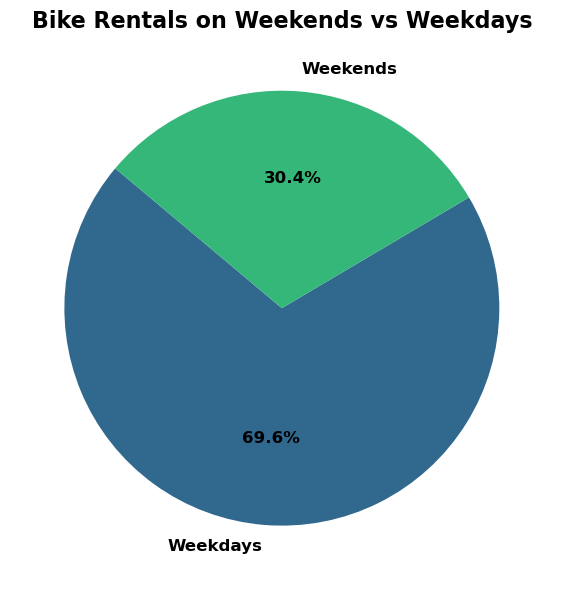

In [84]:
# Grouping the data by 'workingday' and calculating the sum of 'count'
workingday_counts = rent_df.groupby('workingday')['count'].sum().reset_index()

# Setting figure size
plt.figure(figsize=(10, 6))

# Plotting the pie chart
colors = sns.color_palette('viridis', len(workingday_counts))
plt.pie(workingday_counts['count'], labels=workingday_counts['workingday'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'})

# Setting the title
plt.title('Bike Rentals on Weekends vs Weekdays', fontsize=16, weight='bold')

# Showing the plot
plt.tight_layout()
plt.show()

total pengguna sewa sepeda lebih banyak di weekdays daripada weekend

### Question 6: How does the count of casual and registered users compare in 2011 and 2012?

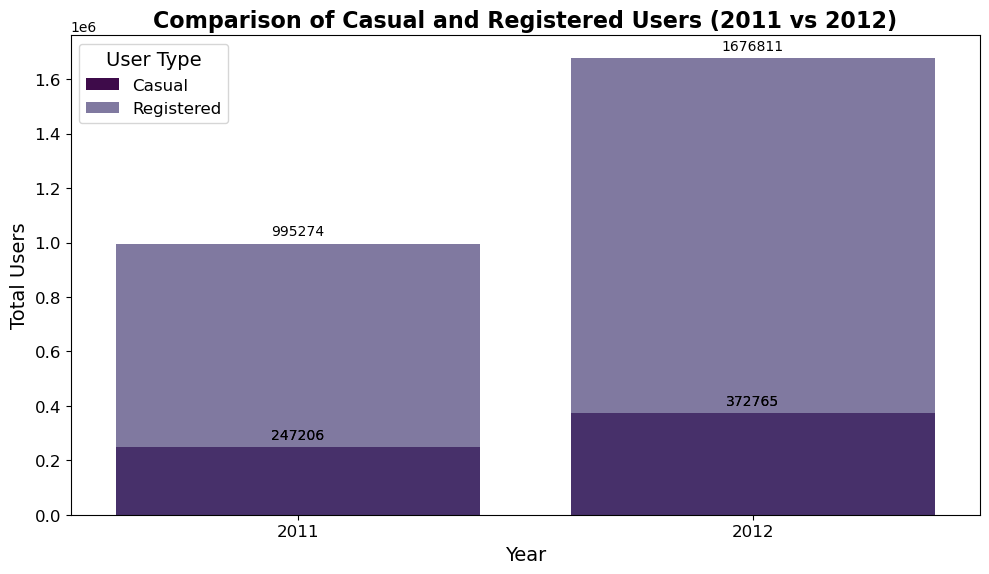

In [82]:
# Setting figure size
plt.figure(figsize=(10, 6))

# Plotting the barplot for casual users
barplot_casual = sns.barplot(x='year', y='casual', data=rent_df, color='#440154FF', label='Casual', estimator=sum, errorbar=None)

# Adding value labels to the barplot for casual users
for p in barplot_casual.patches:
    barplot_casual.annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points')

# Plotting the barplot for registered users
barplot_registered = sns.barplot(x='year', y='registered', data=rent_df, color='#453781FF', label='Registered', estimator=sum, alpha=0.7, errorbar=None)

# Adding value labels to the barplot for registered users
for p in barplot_registered.patches:
    barplot_registered.annotate(format(p.get_height(), '.0f'),
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha = 'center', va = 'center', 
                                xytext = (0, 9), 
                                textcoords = 'offset points')

# Setting the title and labels of the plot
plt.title('Comparison of Casual and Registered Users (2011 vs 2012)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Users', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='User Type', fontsize=12, title_fontsize=14)

# Showing the plot
plt.tight_layout()
plt.show()

jumlah registered users dan casual users meningkat dari tahun 2011 sampai 2012, dan jauh lebih banyak registered users daripada casual users

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

#### Clustering Count of Daily Rentals

          date  count category
562 2012-07-17   6786     High
592 2012-08-16   7605     High
154 2011-06-05   4906   Medium
557 2012-07-12   7446     High
254 2011-09-13   4763   Medium
61  2011-03-03   1685      Low
695 2012-11-27   3959   Medium
296 2011-10-25   4687   Medium
465 2012-04-11   4862   Medium
143 2011-05-25   4978   Medium


C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\4154478766.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster (Quartile)')


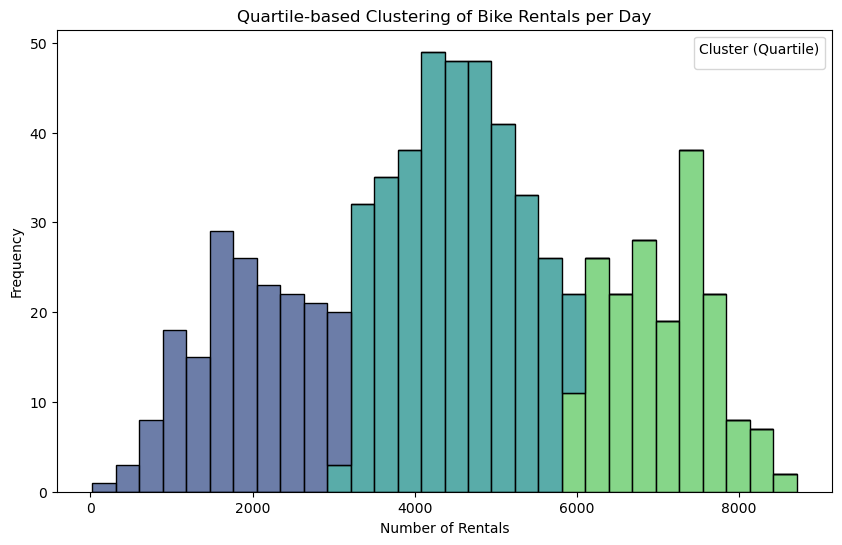

C:\Users\hasta\AppData\Local\Temp\ipykernel_3080\4154478766.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2011-01-01', end='2012-12-31', freq='M')


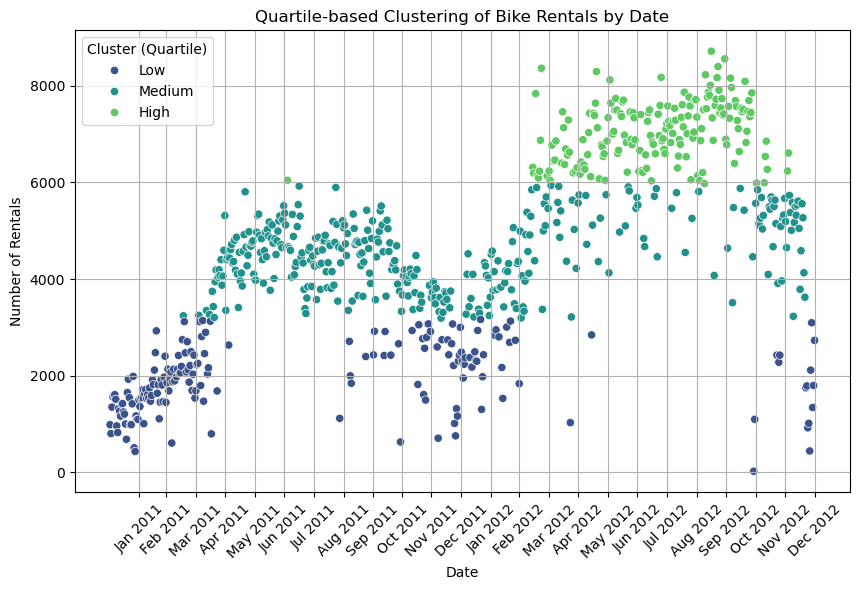

In [88]:
# Ensure the 'date' column is in datetime format
rent_df['date'] = pd.to_datetime(rent_df['date'])

# Group the data by 'date' and calculate the sum of 'count' per day
daily_rentals = rent_df.groupby('date')['count'].sum().reset_index()

# Calculate the quartiles
Q1 = daily_rentals['count'].quantile(0.25)  # 25th percentile
Q3 = daily_rentals['count'].quantile(0.75)  # 75th percentile

# Create a new column 'category' for clustering based on quartiles
daily_rentals['category'] = 'Medium'

# Assign clusters based on quartiles
daily_rentals.loc[daily_rentals['count'] <= Q1, 'category'] = 'Low'
daily_rentals.loc[daily_rentals['count'] >= Q3, 'category'] = 'High'

# Print a random sample of the resulting DataFrame
print(daily_rentals[['date', 'count', 'category']].sample(10))

# Plot a histogram to visualize the distribution of rentals with clustering
plt.figure(figsize=(10, 6))
sns.histplot(data=daily_rentals, x='count', hue='category', multiple='stack', palette='viridis', bins=30)
plt.title('Quartile-based Clustering of Bike Rentals per Day')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.legend(title='Cluster (Quartile)')

plt.show()

# Scatter plot to visualize the clustering over time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='date', y='count', hue='category', data=daily_rentals, palette='viridis')
plt.title('Quartile-based Clustering of Bike Rentals by Date')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend(title='Cluster (Quartile)')
plt.grid(True)

# Generate date range for x-axis ticks (monthly until December 2012)
date_range = pd.date_range(start='2011-01-01', end='2012-12-31', freq='M')
plt.xticks(date_range, date_range.strftime('%b %Y'), rotation=45)

plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2